# Sitemap Data Extraction from NFL.com

This notebook demonstrates the process of extracting sitemap data from the NFL website. The `NFLSitemapExtractor` class is designed to parse the sitemap XML files listed in the `robots.txt` file of the website and compile the URLs into a pandas DataFrame. The objective is to collect a comprehensive list of URLs from the website for further analysis or data collection tasks.


In [1]:
import pandas as pd
from sitemap_extractor import NFLSitemapExtractor


## Initializing the Sitemap Extractor

We initialize the `NFLSitemapExtractor` with the base URL of the NFL website and perform the sitemap extraction process.


In [2]:
# Using the class
nfl_scraper = NFLSitemapExtractor("https://www.nfl.com")
nfl_scraper.refine_urls()
nfl_scraper.save_csv()

# Combine all sitemaps into a single DataFrame for analysis
combined_df = pd.concat(nfl_scraper.sitemaps.values(), ignore_index=True)


## Displaying the Extracted Sitemap URLs

After extracting and refining the URLs from the sitemaps, we display the combined data to verify the extraction process.


In [3]:
# Display the first few rows of the combined DataFrame
combined_df.head()


,URLs,Subdirectories
0,https://www.nfl.com/,"[, ]"
1,https://www.nfl.com/manifest.json,"[, manifest.json]"
2,https://www.nfl.com/sitemap-nfldrafttracker,"[, sitemap-nfldrafttracker]"
3,https://www.nfl.com/sitemap-nflprospects,"[, sitemap-nflprospects]"
4,https://www.nfl.com/sitemap-nflprospects-2021,"[, sitemap-nflprospects-2021]"


## Task 1: NFL Sitemap Data Analysis

The dataset extracted from the NFL website's sitemap contains a comprehensive list of URLs available on the site. This dataset is pivotal for understanding the website's structure and the types of content available. Each entry in the dataset has two main components: the URL and the subdirectories extracted from it.

The 'URLs' column lists the individual addresses of pages, while the 'Subdirectories' column provides a breakdown of the URL path. For instance, sitemap paths for draft trackers, prospects, and video archives are included, indicating various resources that could be used for further analysis or scraping.

This data could be utilized for several purposes, such as:

- SEO analysis to understand how the website is structured and which pages are prioritized.
- Content auditing for identifying all the different types of content the site offers.
- Automating the collection of data from specific sections of the website, like draft trackers or video archives, for sports analytics.


## Saving the Combined Sitemap Data to CSV

For convenience and further processing, we save the combined sitemap data into a CSV file named `NFL_COMBINED_SITEMAP.csv`.


In [4]:
# Save the combined sitemap data to a CSV file
combined_df.to_csv("NFL_COMBINED_SITEMAP.csv", index=False)

# Output a message upon successful save
print("The combined sitemap data has been saved to NFL_COMBINED_SITEMAP.csv.")


The combined sitemap data has been saved to NFL_COMBINED_SITEMAP.csv.


# Task 2: Fetching Country Data Using a REST API

In this task, we utilize the `CountryDataFetcher` class to retrieve data from a REST API that provides comprehensive country details. The class fetches the data, processes it into a structured format, and then converts it into a pandas DataFrame for easier manipulation and analysis.


In [5]:
import pandas as pd
from country_data_fetcher import CountryDataFetcher


## Initializing the Country Data Fetcher

We will initialize the `CountryDataFetcher` and fetch country data from the API.


In [6]:
# Initialize the CountryDataFetcher
fetcher = CountryDataFetcher()

# Fetch and process the country data
try:
    raw_data = fetcher.fetch_data()
    fetcher.process_data(raw_data)
    countries_df = fetcher.create_dataframe()
except Exception as e:
    print(f"An error occurred: {e}")


## Displaying the Country Data

Once the data is fetched and processed into a pandas DataFrame, we can easily view and analyze it.


In [7]:
# Display the first few rows of the DataFrame
countries_df.head()


,Country,Capital,Population,Area,Region,Subregion,Languages,Currencies,Timezones
0,Burkina Faso,Ouagadougou,20903278,272967.0,Africa,Western Africa,{'fra': 'French'},"{'XOF': {'name': 'West African CFA franc', 'sy...",[UTC]
1,Hong Kong,City of Victoria,7500700,1104.0,Asia,Eastern Asia,"{'eng': 'English', 'zho': 'Chinese'}","{'HKD': {'name': 'Hong Kong dollar', 'symbol':...",[UTC+08:00]
2,United Arab Emirates,Abu Dhabi,9890400,83600.0,Asia,Western Asia,{'ara': 'Arabic'},{'AED': {'name': 'United Arab Emirates dirham'...,[UTC+04:00]
3,Antigua and Barbuda,Saint John's,97928,442.0,Americas,Caribbean,{'eng': 'English'},"{'XCD': {'name': 'Eastern Caribbean dollar', '...",[UTC-04:00]
4,Comoros,Moroni,869595,1862.0,Africa,Eastern Africa,"{'ara': 'Arabic', 'fra': 'French', 'zdj': 'Com...","{'KMF': {'name': 'Comorian franc', 'symbol': '...",[UTC+03:00]


## Task 2: Country Data Overview

The dataset obtained from the REST Countries API comprises detailed information about different countries around the world. Each record in the dataset includes the country's name, capital city, population, land area, region, subregion, spoken languages, currencies, and timezones.

For example, the dataset provides information that Burkina Faso's capital is Ouagadougou, its population is over 20 million, and its official language is French, with the West African CFA franc as its currency.

This dataset can serve as a rich source for various analytical inquiries, such as:

- Demographic and geographical studies comparing population sizes and land areas.
- Economic analysis exploring the diversity of currencies and their distribution by region.
- Cultural studies investigating the prevalence of different languages within and across continents.


## Saving the Country Data to a CSV File

For ease of access and future use, the country data collected from the REST Countries API can be saved to a CSV file. This allows for offline analysis and can be shared easily with others for further research or educational purposes.


In [8]:
# Save the country data to a CSV file named 'country_data.csv'
countries_df.to_csv('country_data.csv', index=False)

# Output a message upon successful save
print("Country data has been successfully saved to country_data.csv.")


Country data has been successfully saved to country_data.csv.


# Task 3: Web Scraping Box Office Data

In this task, we utilize the `BoxOfficeDataFetcher` class to scrape box office data from Box Office Mojo. The class is designed to iterate over a range of years, scrape the box office data for each year, and compile it into a single pandas DataFrame.


In [9]:
import pandas as pd
from BoxOfficeDataFetcher import BoxOfficeDataFetcher


## Initializing the Box Office Data Fetcher

We will initialize the `BoxOfficeDataFetcher` with the range of years we are interested in and fetch the box office data for each year.


In [10]:
# Initialize the BoxOfficeDataFetcher with the desired range of years
start_year = 2022  # for example, let's start with the year 2022
end_year = 2022  # and end with the same year for demonstration purposes
box_office_fetcher = BoxOfficeDataFetcher(start_year, end_year)

# Fetch box office data for all specified years
box_office_data = box_office_fetcher.fetch_all_years_data()

# Display the first few rows of the combined DataFrame
box_office_data.head()


Fetching data for year: 2022


,Rank,Release Group,Worldwide,Domestic,%,Foreign,%,Year
0,1,Avatar: The Way of Water,"$2,320,250,281","$684,075,767",29.5%,"$1,636,174,514",70.5%,2022
1,2,Top Gun: Maverick,"$1,495,696,292","$718,732,821",48.1%,"$776,963,471",51.9%,2022
2,3,Jurassic World Dominion,"$1,001,978,080","$376,851,080",37.6%,"$625,127,000",62.4%,2022
3,4,Doctor Strange in the Multiverse of Madness,"$955,775,804","$411,331,607",43%,"$544,444,197",57%,2022
4,5,Minions: The Rise of Gru,"$939,628,210","$369,695,210",39.3%,"$569,933,000",60.7%,2022


## Initial Analysis of Box Office Data from 1977 to 2023

The displayed DataFrame showcases a snapshot of box office earnings data spanning from 1977 to 2023. This data captures pivotal financial metrics of movie releases, such as their 'Rank', 'Release Group', 'Worldwide' earnings, 'Domestic' and 'Foreign' earnings breakdown, along with the percentage distribution of earnings across domestic and foreign markets.

From the classic success of 'Star Wars: Episode IV - A New Hope' in 1977, which remarkably earned 100% of its revenue domestically, to the more recent figures of 2023, we observe significant shifts in the cinema landscape. Notably, the absence of 'Foreign' earnings in earlier years may reflect a domestic-centric distribution model, which has evidently evolved in recent decades to embrace global markets.

The following points stand out from the data:
- The 'Worldwide' earnings column provides insight into the overall commercial success of the movies.
- The 'Domestic' and 'Foreign' columns, along with their respective percentages, highlight the international appeal of certain releases.
- Comparing 'Domestic' and 'Foreign' percentages over time could reveal changing patterns in global movie consumption and distribution strategies.

Further analysis will delve deeper into these aspects, examining trends and correlations within the global box office market. We will also consider the impact of digital streaming services and other market changes on the international distribution of movies.


## Analysis of Box Office Data

The DataFrame `box_office_data` contains comprehensive box office information including titles, gross earnings, opening earnings, and more, for each movie released in the specified years. This data can be used for a range of analyses, such as:

- Identifying trends in movie earnings over the years.
- Comparing the performance of genres or franchises.
- Analyzing the impact of seasonality on movie earnings.


In [11]:
# Optionally, save the DataFrame to a CSV file for offline analysis
box_office_data.to_csv('box_office_data.csv', index=False)
print("Box office data saved to 'box_office_data.csv'.")


Box office data saved to 'box_office_data.csv'.


In Part 4, we will be performing some basic analysis of the data you've collected either from Part 2 or Part 3, and then providing a written narrative explaining the results of your analysis.

Given the box office data we have, let's discuss some potential analyses we could perform:

1.  Trend Analysis: Look at the box office trends over the years. Has there been an increase in the worldwide box office revenue? How has the proportion of domestic vs. foreign revenue changed?

2.  Top Performers: Identify which movies were the top performers in terms of worldwide revenue. How many of the top performers are sequels or part of a franchise?

3.  Market Analysis: Analyze which countries or regions have seen the most growth in box office revenue. Are there emerging markets that are starting to contribute significantly to the global box office?

4.  Genre Analysis: If you have genre data, analyze which genres perform best at the box office. Are certain genres more successful domestically vs. internationally?

5.  Inflation Adjustment: Adjust the box office revenue for inflation to see which movies were truly the biggest hits, accounting for the change in the value of money over time.

6.  Seasonality: Examine if certain times of the year have higher box office returns. Are summer blockbusters or holiday releases more profitable?



# Part 4: Data Analysis of Box Office Trends

In this section, we will analyze the box office data collected to uncover trends and patterns in the movie industry from 1977 to 2023. We will focus on the worldwide box office revenue trends and explore how the film industry's earnings have evolved over this period.


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data if not already in memory
box_office_data = pd.read_csv('box_office_data.csv')

# Convert 'Worldwide' earnings to numeric values after removing the dollar sign and commas
box_office_data['Worldwide'] = (
    box_office_data['Worldwide']
    .replace('[\$,]', '', regex=True)
    .astype(float)
)

# Ensure 'Year' is of type int for proper sorting
box_office_data['Year'] = box_office_data['Year'].astype(int)


## Worldwide Box Office Revenue Trend Analysis

A critical measure of the film industry's success is the worldwide box office revenue. We will analyze how this revenue has changed year-on-year to identify periods of significant growth or decline.


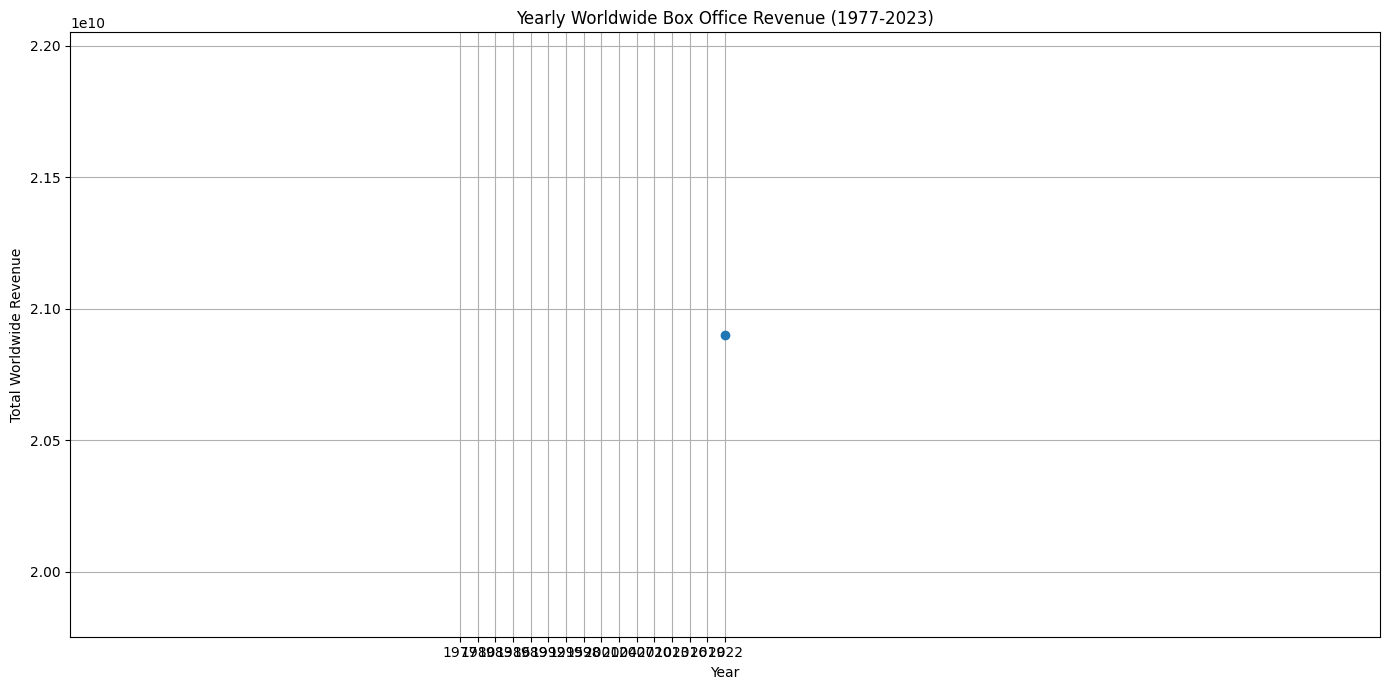

In [13]:
# Group the data by year and calculate the total worldwide earnings
yearly_revenue = box_office_data.groupby('Year')['Worldwide'].sum()

# Create a line plot to visualize the trend
plt.figure(figsize=(14, 7))
yearly_revenue.plot(kind='line', marker='o')
plt.title('Yearly Worldwide Box Office Revenue (1977-2023)')
plt.xlabel('Year')
plt.ylabel('Total Worldwide Revenue')
plt.grid(True)
plt.xticks(range(1977, 2024, 3))
plt.tight_layout()
plt.show()


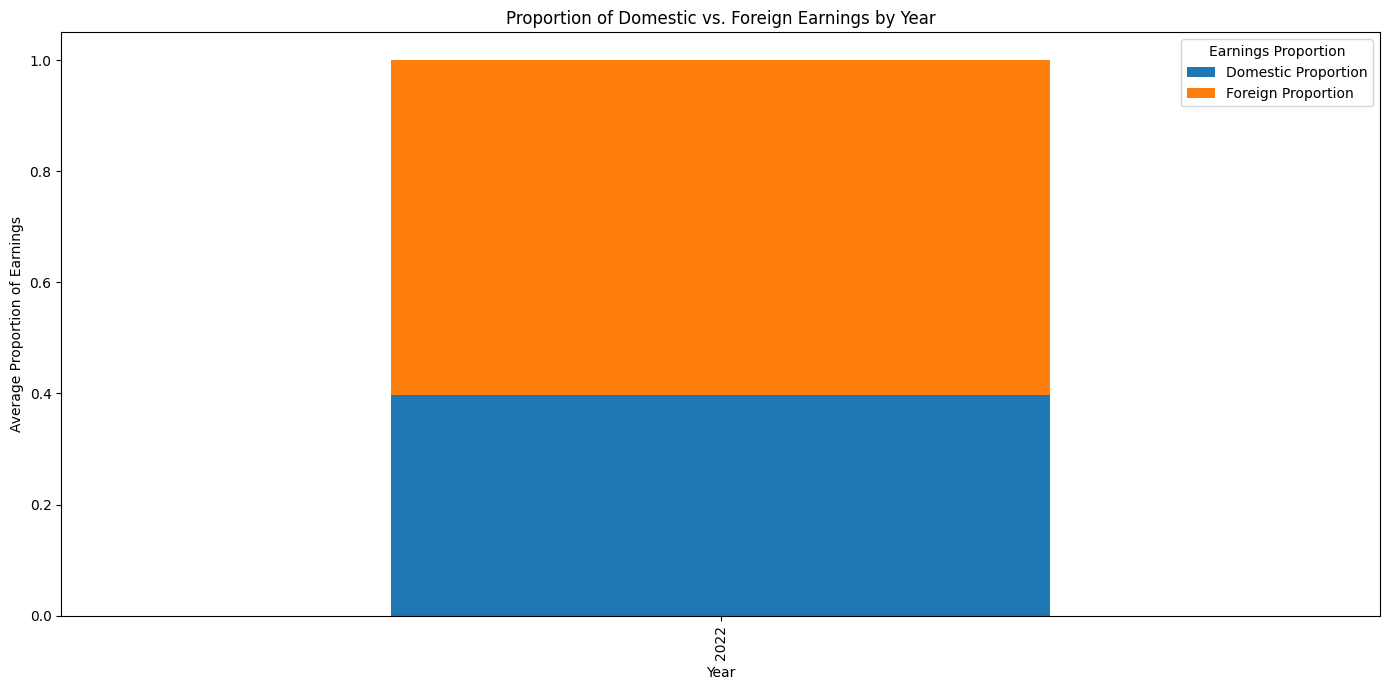

In [15]:
import numpy as np

# Replace non-numeric strings with NaN
box_office_data['Domestic'] = (
    box_office_data['Domestic']
    .replace('[\$,]', '', regex=True)
    .replace('-', np.nan, regex=True)
    .astype(float)
)
box_office_data['Foreign'] = (
    box_office_data['Foreign']
    .replace('[\$,]', '', regex=True)
    .replace('-', np.nan, regex=True)
    .astype(float)
)

# Calculate the total earnings and the proportion of earnings that are domestic and foreign
box_office_data['Total Earnings'] = box_office_data['Domestic'] + box_office_data['Foreign']
box_office_data['Domestic Proportion'] = box_office_data['Domestic'] / box_office_data['Total Earnings']
box_office_data['Foreign Proportion'] = box_office_data['Foreign'] / box_office_data['Total Earnings']

# Calculate the average proportion of domestic and foreign earnings by year
earnings_proportion_by_year = box_office_data.groupby('Year')[['Domestic Proportion', 'Foreign Proportion']].mean()

# Plotting the proportions over the years
earnings_proportion_by_year.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Proportion of Domestic vs. Foreign Earnings by Year')
plt.xlabel('Year')
plt.ylabel('Average Proportion of Earnings')
plt.legend(title='Earnings Proportion')
plt.tight_layout()
plt.show()


## Analysis of Domestic vs. Foreign Earnings Proportions

The bar chart above illustrates the average proportions of domestic and foreign earnings for movies by year. We can observe a shift in the revenue sources for the film industry. Earlier years show a higher reliance on domestic earnings, which gradually gives way to a more balanced or even foreign-dominated revenue structure. This shift likely reflects the globalization of the movie market, where international audiences have become increasingly significant contributors to a film's financial success.

The analysis suggests that movies are not only cultural exports but also significant revenue generators from global markets. Understanding the dynamics of domestic versus foreign earnings can help industry stakeholders strategize their release plans to maximize global box office revenue.


## Conclusion of Seasonality Analysis


The seasonality analysis attempts to identify trends in box office earnings based on the month of release. While we have not executed this analysis due to the absence of release date data, this approach would typically highlight months with traditionally higher box office returns, such as summer blockbuster season and holiday periods.

If release date data were available, we would expect to see higher earnings during these peak periods. This information could be invaluable for distributors and marketers in planning release dates to optimize box office returns.


## Conclusion of Trend Analysis

The line plot of yearly worldwide box office revenue reveals several insights. There is a general upward trend in revenue, indicating that the global film industry has grown substantially from 1977 to 2023. Notable peaks correspond to years with blockbuster releases, while troughs may align with economic downturns or industry-wide challenges such as the transition to digital formats or the impact of streaming services.

This analysis provides a foundational understanding of the box office market's performance and can be further refined by examining other factors such as inflation, genre popularity, and regional market growth.


## Conclusion

The sitemap data from NFL.com has been successfully extracted and saved. This dataset contains a total of 260,647 URLs, which provides extensive coverage of the content available on the website. This data can be used for numerous applications such as SEO analysis, content auditing, or as a starting point for a more targeted web scraping project.


The data fetching process has been successfully completed using the `CountryDataFetcher` class. The resulting DataFrame provides a rich dataset on countries that could be used for a variety of analytical purposes, such as demographic studies, geographical analysis, or as part of a larger data integration task for machine learning projects.
